In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'bn-dse/hw2/data_clean'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
os.chdir(base_dir)

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    rescale = 1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    validation_split=0.3)

In [6]:
train_generator = datagen.flow_from_directory(
                            'images_jpg',
                            target_size=(255,255),
                            class_mode='categorical',
                            subset='training')
test_generator = datagen.flow_from_directory(
                            'images_jpg',
                            target_size=(255,255),
                            class_mode='categorical',
                            subset='validation')

Found 458 images belonging to 6 classes.
Found 194 images belonging to 6 classes.


In [7]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
pretrain = MobileNetV2(weights='imagenet',input_shape = (224, 224, 3),include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [8]:
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#pretrain = InceptionV3(weights='imagenet',input_shape = (150, 150, 3),include_top=False)

In [9]:
pretrain.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [10]:
for layer in pretrain.layers:
    layer.trainable = False

In [11]:
pretrain_out = pretrain.output

In [12]:
#x = tf.keras.layers.Flatten(name='my_flat')(pretrain_out)
#x = tf.keras.layers.Dense(1024,activation='relu',name='my_dense1')(x)
#pretrain_out = pretrain.output
x = tf.keras.layers.GlobalAvgPool2D()(pretrain_out)
x = tf.keras.layers.Dense(256,activation='relu',name='my_dense1')(x)
x = tf.keras.layers.Dropout(0.2,name='my_drop')(x)
x = tf.keras.layers.Dense(6,activation='softmax',name='my_dense2')(x)

model = tf.keras.Model(pretrain.input,x)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [14]:
train = model.fit_generator(train_generator,validation_data= test_generator,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
15/15 [==============================] - 219s 15s/step - loss: 1.1848 - acc: 0.5677 - val_loss: 0.6058 - val_acc: 0.7990
Epoch 2/20
15/15 [==============================] - 17s 1s/step - loss: 0.5160 - acc: 0.8341 - val_loss: 0.4476 - val_acc: 0.8402
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.4120 - acc: 0.8603 - val_loss: 0.5685 - val_acc: 0.8041
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.3187 - acc: 0.8952 - val_loss: 0.3847 - val_acc: 0.8505
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.2105 - acc: 0.9301 - val_loss: 0.3206 - val_acc: 0.8763
Epoch 6/20
15/15 [==============================] - 16s 1s/step - loss: 0.2251 - acc: 0.9301 - val_loss: 0.4288 - val_acc: 0.8351
Epoch 7/20
15/15 [==============================] - 16s 1s/step - loss: 0.1716 - acc: 0.9367 - val_loss: 0.4109 - val_acc: 0.8711
Epoch 8/20
1

In [15]:
#model.save('sushi_mobileNet2.h5')

Text(0, 0.5, 'Accuracy')

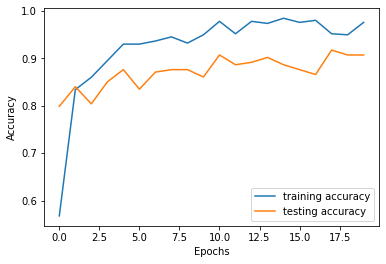

In [23]:
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.legend(['training accuracy','testing accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

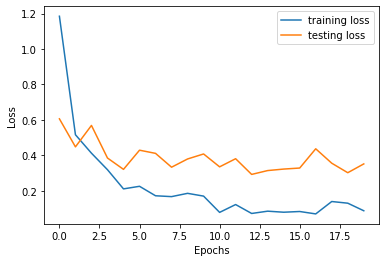

In [24]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.legend(['training loss','testing loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [19]:
model.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.3510410189628601, 0.8969072103500366]

In [27]:
import PIL

In [34]:
test_img = []
for imgpath in test_generator.filepaths:
    tempimg = PIL.Image.open(imgpath)
    tempimg = tempimg.resize((224,224))
    tempimg = np.array(tempimg)
    test_img.append(tempimg)



In [35]:
test_img = np.array(test_img)
test_img.shape

(194, 224, 224, 3)

In [53]:
pred_test = model.predict(test_img/255)
pred_test = np.argmax(pred_test,axis=1)
pred_test.shape

(194,)

In [40]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(pred_test,test_generator.labels))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       1.00      0.90      0.95        31
           2       0.91      0.91      0.91        22
           3       0.91      0.90      0.91        48
           4       0.91      0.97      0.94        32
           5       0.94      1.00      0.97        33

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



In [20]:
import requests
from io import BytesIO
from PIL import Image

In [21]:
def urlpred(url):
    pred_dict = {0: 'ebi', 1: 'ika', 2: 'ikura', 3: 'maguro', 4: 'salmon', 5: 'uni'}
    r = requests.get(url)
    img = Image.open(BytesIO(r.content))
    img = img.resize((224,224))
    img = np.array(img)/255
    pred = model.predict(img.reshape(-1,224,224,3))
    return pred_dict[np.argmax(pred)]

In [22]:
urlpred('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSSU2hyu4PSA3jVUr9ELQicqhNVhnYuTg0KRA&usqp=CAU')

'salmon'